In [11]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA

In [12]:
author_df = pd.read_csv("../analytics/author_level_analytics.csv")
author_df = author_df.rename(columns={"Unnamed: 0": "author"})
author_df.head()

,author,TTR,HR,R,genre,R_scaled
0,curtius,0.066677,0.251656,122.052889,prose,0.437035
1,germanicus,0.284471,0.480676,135.032294,poetry,0.952659
2,carmina_pripea,0.353924,0.609973,125.894025,poetry,0.589629
3,pliny_younger,0.065237,0.294073,117.813751,prose,0.268630
4,pliny_maior,0.118743,0.415071,125.597445,prose,0.577847


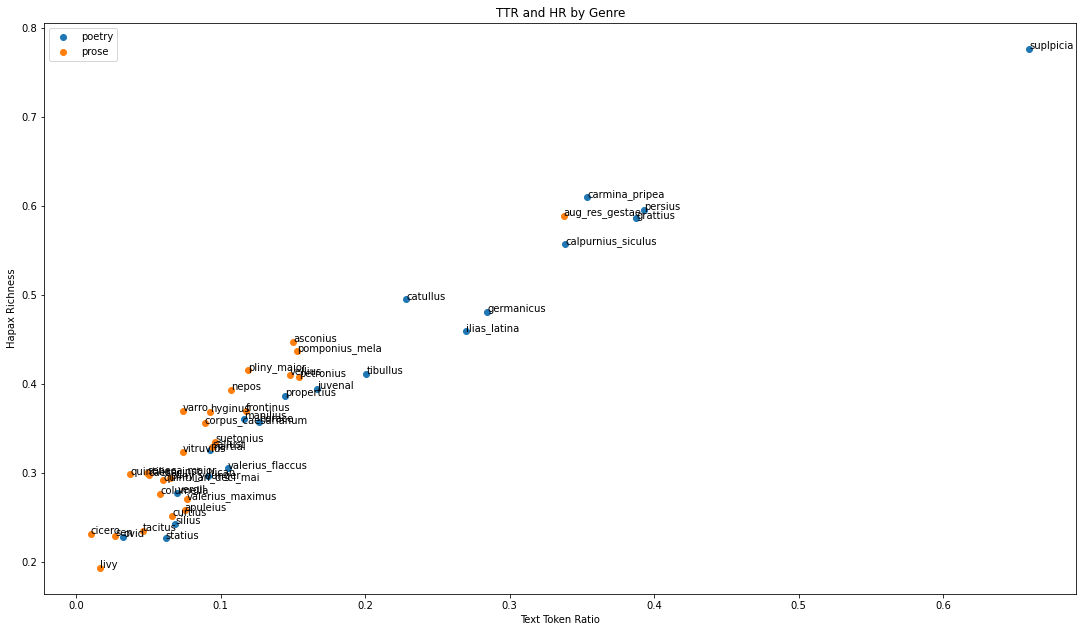

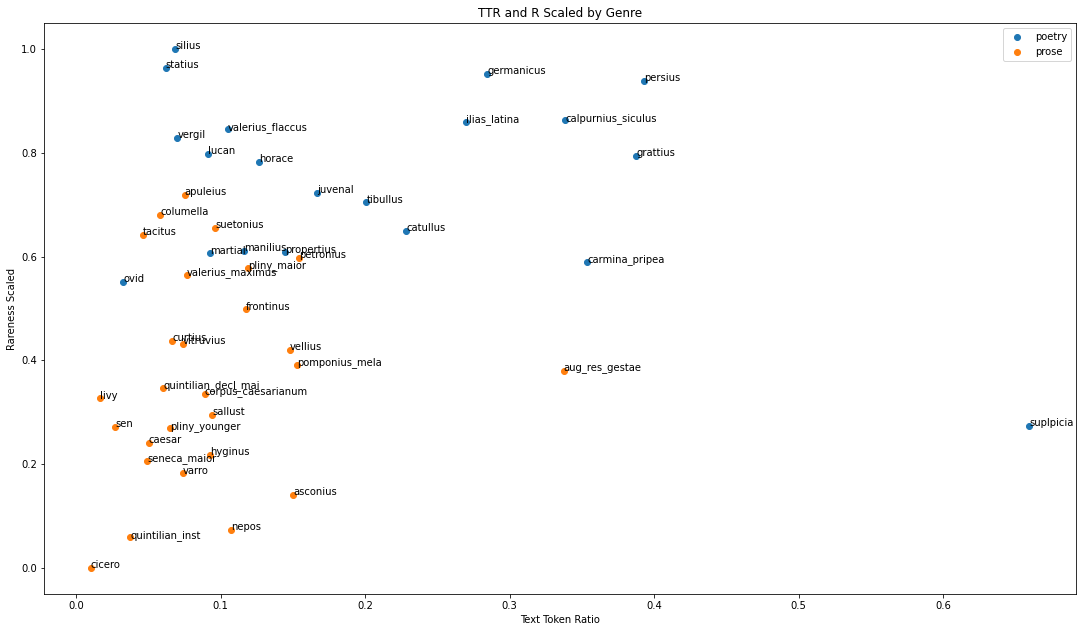

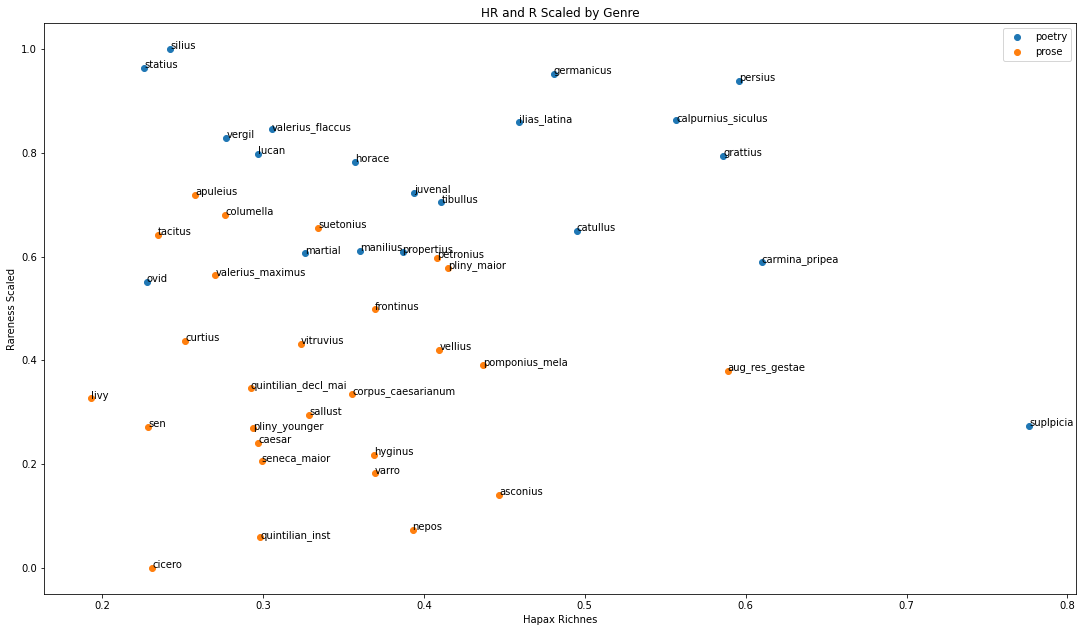

In [44]:
# Plot of authors by poetry and prose along TTR and HR
genres = author_df.groupby("genre")
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in genres:
    ax.plot(group.TTR, group.HR, marker='o', linestyle='', label=name)
ax.legend()
for i in range(author_df.shape[0]):
    ax.text(x=author_df.TTR[i], y=author_df.HR[i], s=author_df.author[i])
fig.set_size_inches(18.5, 10.5)
plt.title("TTR and HR by Genre")
plt.xlabel("Text Token Ratio")
plt.ylabel("Hapax Richness")
plt.savefig("ttr_hr_genre.png")

genres = author_df.groupby("genre")
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in genres:
    ax.plot(group.TTR, group.R_scaled, marker='o', linestyle='', label=name)
ax.legend()
for i in range(author_df.shape[0]):
    ax.text(x=author_df.TTR[i], y=author_df.R_scaled[i], s=author_df.author[i])
fig.set_size_inches(18.5, 10.5)
plt.title("TTR and R Scaled by Genre")
plt.xlabel("Text Token Ratio")
plt.ylabel("Rareness Scaled")
plt.savefig("ttr_r_scaled_genre.png")

genres = author_df.groupby("genre")
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in genres:
    ax.plot(group.HR, group.R_scaled, marker='o', linestyle='', label=name)
ax.legend()
for i in range(author_df.shape[0]):
    ax.text(x=author_df.HR[i], y=author_df.R_scaled[i], s=author_df.author[i])
fig.set_size_inches(18.5, 10.5)
plt.title("HR and R Scaled by Genre")
plt.xlabel("Hapax Richnes")
plt.ylabel("Rareness Scaled")
plt.savefig("hr_r_scaled_genre.png")

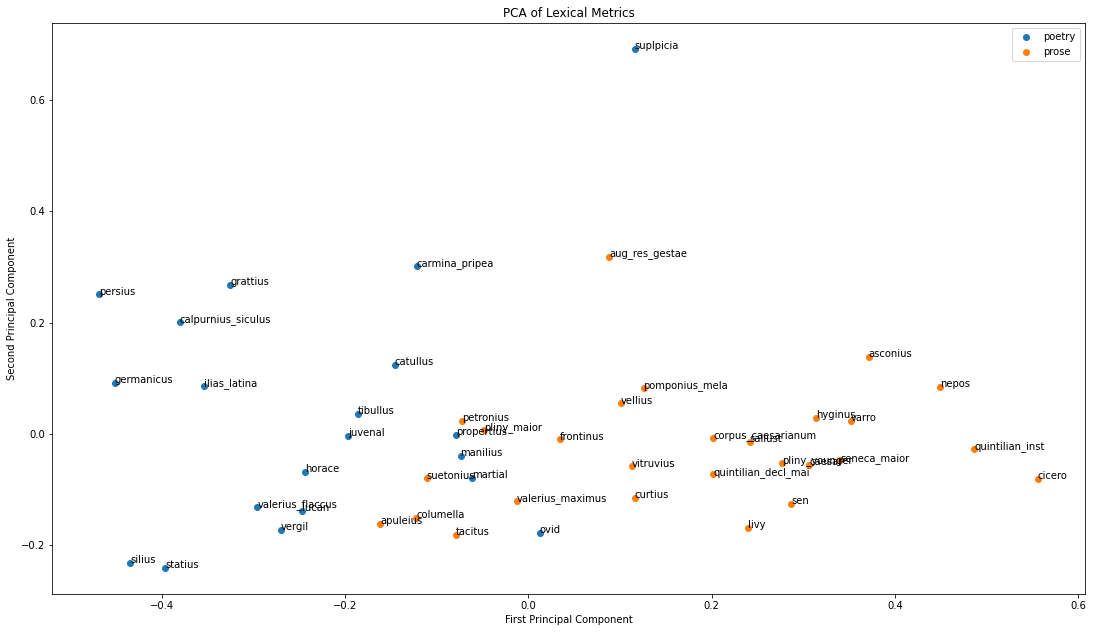

In [42]:
reduced_dims = PCA(n_components=2).fit_transform(author_df[["TTR", "HR", "R_scaled"]])
author_df["pc1"] = reduced_dims[:, 0]
author_df["pc2"] = reduced_dims[:, 1]
author_df["pc2_plt"] = reduced_dims[:, 1] + 0.3
genres = author_df.groupby("genre")
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in genres:
    ax.plot(group.pc1, group.pc2, marker='o', linestyle='', label=name)
for i in range(author_df.shape[0]):
    ax.text(x=author_df.pc1[i], y=author_df.pc2[i], s=author_df.author[i])
ax.legend()
plt.title("PCA of Lexical Metrics")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("pca.png")